In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df=pd.read_csv("/content/accident.csv")
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [101]:
df.isna().sum()

,0
Age,0
Gender,1
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [102]:
df.dtypes

,0
Age,int64
Gender,object
Speed_of_Impact,float64
Helmet_Used,object
Seatbelt_Used,object
Survived,int64


In [103]:
df.Survived

,Survived
0,1
1,1
2,0
3,0
4,0
...,...
195,1
196,1
197,1
198,1


In [104]:
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [105]:
df.nunique()

,0
Age,51
Gender,2
Speed_of_Impact,80
Helmet_Used,2
Seatbelt_Used,2
Survived,2


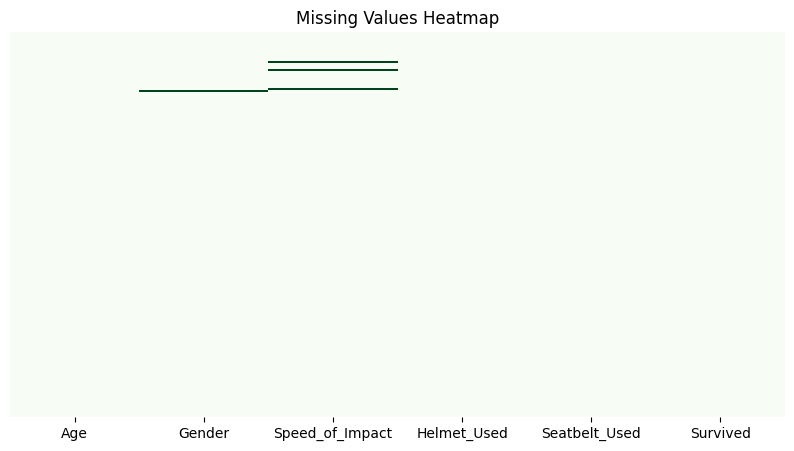

In [106]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='Greens', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


<ipython-input-107-4bfe77d33a9d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='Greens')


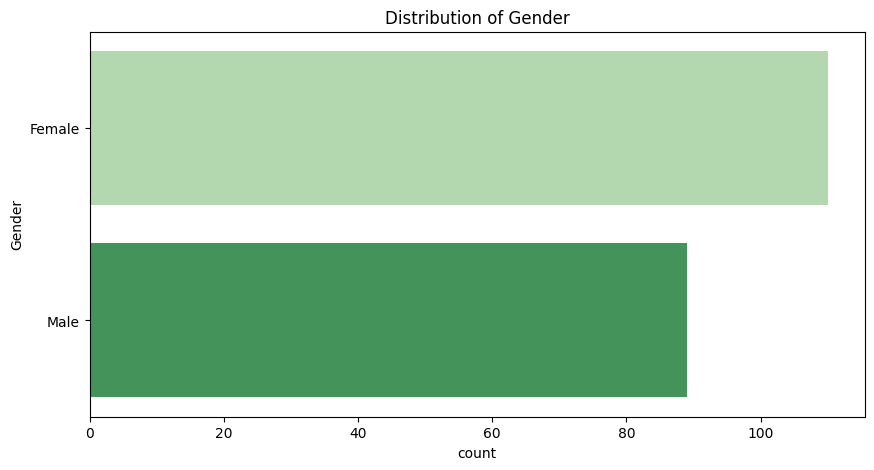

<ipython-input-107-4bfe77d33a9d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='Greens')


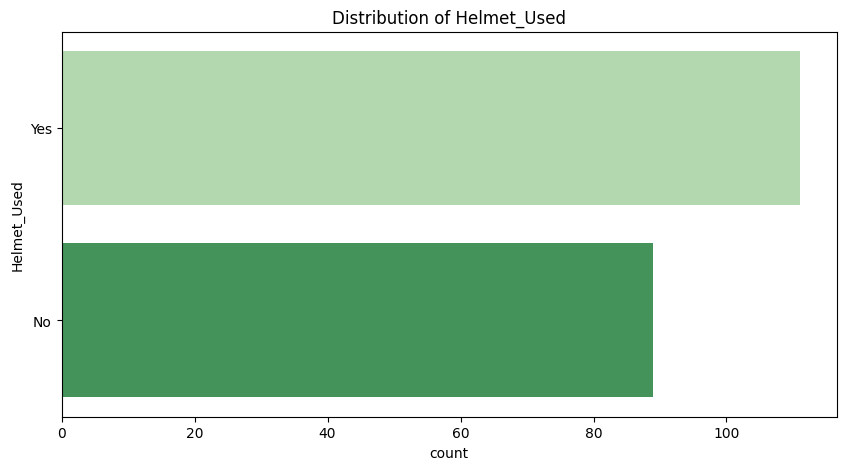

<ipython-input-107-4bfe77d33a9d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='Greens')


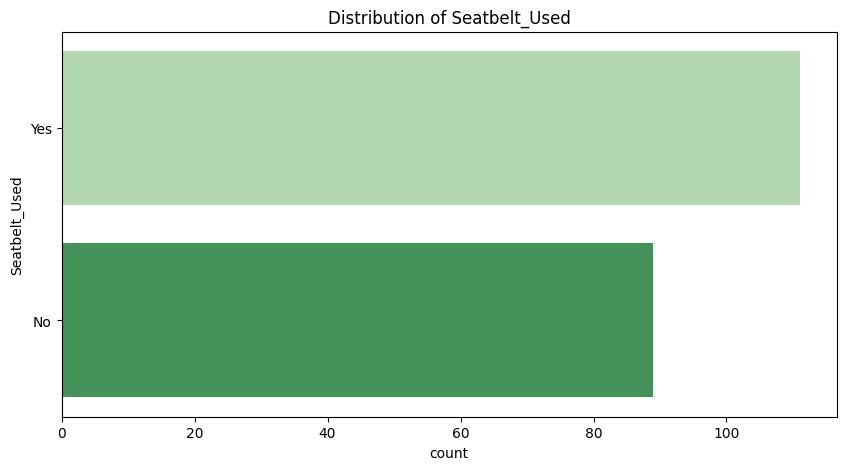

In [107]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='Greens')
    plt.title(f"Distribution of {col}")
    plt.show()


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [109]:
df.describe()

,Age,Speed_of_Impact,Survived
count,200.00000,197.000000,200.00000
mean,43.42500,70.441624,0.50500
std,14.94191,30.125298,0.50123
min,18.00000,20.000000,0.00000
25%,31.00000,43.000000,0.00000
50%,43.50000,71.000000,1.00000
75%,56.00000,95.000000,1.00000
max,69.00000,119.000000,1.00000


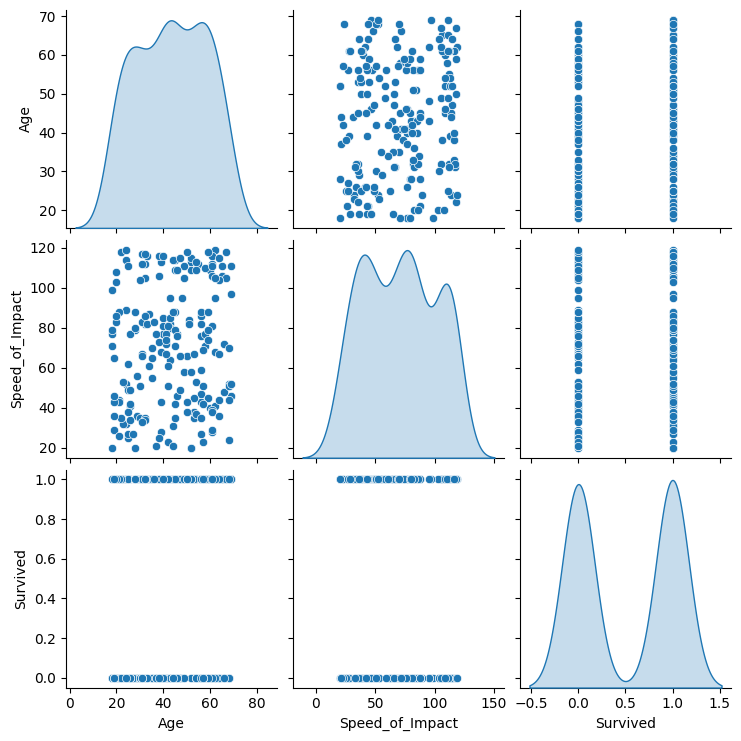

In [110]:
sns.pairplot(df.sample(min(500, len(df))), diag_kind="kde")
plt.show()


In [111]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

print(df.head())

   Age  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived  Gender_Male
0   56             27.0          No            No         1        False
1   69             46.0          No           Yes         1        False
2   46             46.0         Yes           Yes         0         True
3   32            117.0          No           Yes         0         True
4   60             40.0         Yes           Yes         0        False


In [112]:
df.dtypes


,0
Age,int64
Speed_of_Impact,float64
Helmet_Used,object
Seatbelt_Used,object
Survived,int64
Gender_Male,bool


In [113]:
df['Helmet_Used'] = df['Helmet_Used'].map({'Yes': 1, 'No': 0})
df['Seatbelt_Used'] = df['Seatbelt_Used'].map({'Yes': 1, 'No': 0})

print(df.head())

   Age  Speed_of_Impact  Helmet_Used  Seatbelt_Used  Survived  Gender_Male
0   56             27.0            0              0         1        False
1   69             46.0            0              1         1        False
2   46             46.0            1              1         0         True
3   32            117.0            0              1         0         True
4   60             40.0            1              1         0        False


# Checking correlation

In [114]:
df.corr()


,Age,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived,Gender_Male
Age,1.000000,0.106614,0.094387,-0.006868,0.110090,-0.055910
Speed_of_Impact,0.106614,1.000000,-0.010920,-0.000007,0.042520,-0.048110
Helmet_Used,0.094387,-0.010920,1.000000,0.088977,-0.041353,0.032493
Seatbelt_Used,-0.006868,-0.000007,0.088977,1.000000,0.059263,-0.068732
Survived,0.110090,0.042520,-0.041353,0.059263,1.000000,0.121845
Gender_Male,-0.055910,-0.048110,0.032493,-0.068732,0.121845,1.000000


In [115]:

df.corr()['Survived']

,Survived
Age,0.110090
Speed_of_Impact,0.042520
Helmet_Used,-0.041353
Seatbelt_Used,0.059263
Survived,1.000000
Gender_Male,0.121845


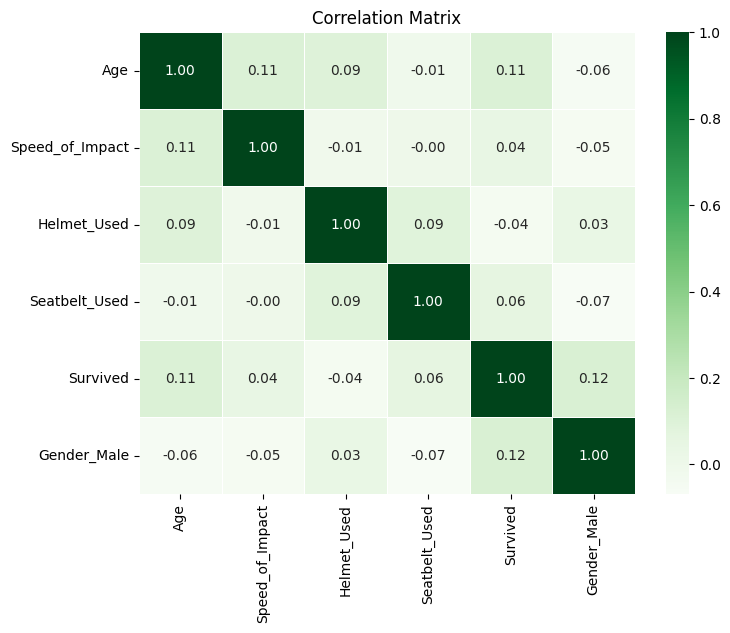

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [117]:

df.isna().sum()

,0
Age,0
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0
Gender_Male,0


In [118]:

df['Speed_of_Impact']



,Speed_of_Impact
0,27.0
1,46.0
2,46.0
3,117.0
4,40.0
...,...
195,111.0
196,51.0
197,110.0
198,103.0


In [119]:
df=df.dropna()


In [120]:
df.isna().sum()


,0
Age,0
Speed_of_Impact,0
Helmet_Used,0
Seatbelt_Used,0
Survived,0
Gender_Male,0


# Checking outliers

In [121]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3)

print("Number of outliers in each column:")
print(outliers.sum(axis=0))


Number of outliers in each column:
Age                0
Speed_of_Impact    0
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64


In [122]:

from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
df_numeric = df.select_dtypes(include=[np.number])
outliers_pred = iso.fit_predict(df_numeric)

df['outlier'] = (outliers_pred == -1)
print("Number of outliers detected:", df['outlier'].sum())


Number of outliers detected: 10


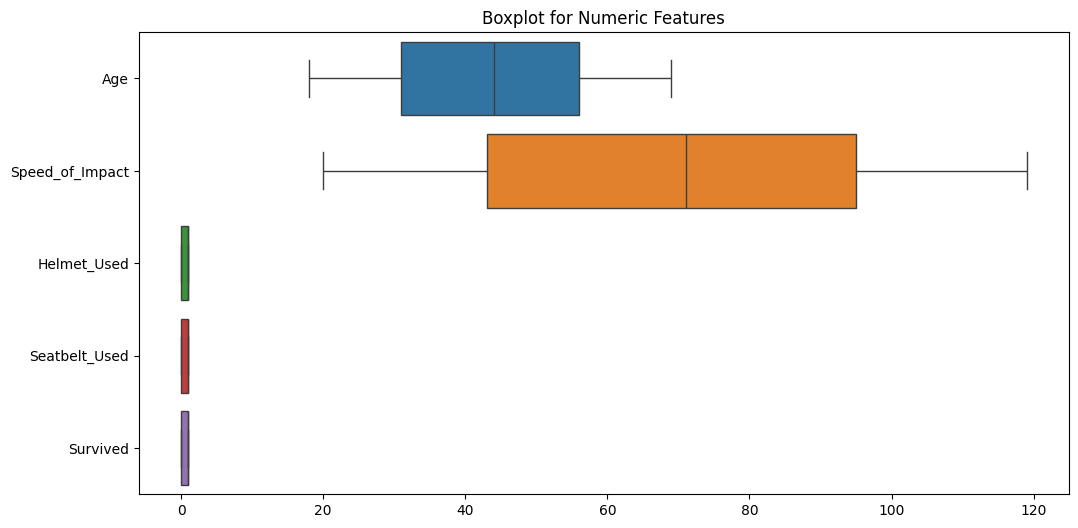

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for each numeric column
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient="h")
plt.title("Boxplot for Numeric Features")
plt.show()


In [124]:
df.drop(columns=['outlier'], inplace=True)


In [125]:
df

,Age,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived,Gender_Male
0,56,27.0,0,0,1,False
1,69,46.0,0,1,1,False
2,46,46.0,1,1,0,True
3,32,117.0,0,1,0,True
4,60,40.0,1,1,0,False
...,...,...,...,...,...,...
195,69,111.0,0,1,1,False
196,30,51.0,0,1,1,False
197,58,110.0,0,1,1,True
198,20,103.0,0,1,1,True


In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df.drop(columns=['Survived'])
y = df['Survived']

X = X.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel='rbf', C=1.0, gamma=0.1, random_state=42)
svm_clf.fit(X_train_scaled, y_train)

y_pred = svm_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.55
Confusion Matrix:
 [[12  8]
 [10 10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.60      0.57        20
           1       0.56      0.50      0.53        20

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40



In [127]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X = X.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel='rbf', C=0.8, gamma=10, random_state=42)
svm_clf.fit(X_train_scaled, y_train)

y_pred = svm_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.55
Confusion Matrix:
 [[ 8 12]
 [ 6 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.40      0.47        20
           1       0.54      0.70      0.61        20

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.54        40
weighted avg       0.55      0.55      0.54        40



In [128]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X = X.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel='rbf', C=0.2, gamma=100, random_state=42)
svm_clf.fit(X_train_scaled, y_train)

y_pred = svm_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5
Confusion Matrix:
 [[ 0 20]
 [ 0 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.50      1.00      0.67        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [129]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X = X.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel='rbf', C=0.1, gamma=1000, random_state=42)
svm_clf.fit(X_train_scaled, y_train)

y_pred = svm_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5
Confusion Matrix:
 [[ 0 20]
 [ 0 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.50      1.00      0.67        20

    accuracy                           0.50        40
   macro avg       0.25      0.50      0.33        40
weighted avg       0.25      0.50      0.33        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [130]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X = X.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel='rbf', C=0.5, gamma=5, random_state=42)
svm_clf.fit(X_train_scaled, y_train)

y_pred = svm_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6
Confusion Matrix:
 [[10 10]
 [ 6 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.50      0.56        20
           1       0.58      0.70      0.64        20

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40



In [131]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X = X.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel='rbf', C=0.5, gamma=2, random_state=42)
svm_clf.fit(X_train_scaled, y_train)

y_pred = svm_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6
Confusion Matrix:
 [[13  7]
 [ 9 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.65      0.62        20
           1       0.61      0.55      0.58        20

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40



In [132]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X = X.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel='rbf', C=0.5, gamma=1, random_state=42)
svm_clf.fit(X_train_scaled, y_train)

y_pred = svm_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.625
Confusion Matrix:
 [[14  6]
 [ 9 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.70      0.65        20
           1       0.65      0.55      0.59        20

    accuracy                           0.62        40
   macro avg       0.63      0.62      0.62        40
weighted avg       0.63      0.62      0.62        40



In [133]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X = X.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel='rbf', C=0.5, gamma=0.1, random_state=42)
svm_clf.fit(X_train_scaled, y_train)

y_pred = svm_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.55
Confusion Matrix:
 [[12  8]
 [10 10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.60      0.57        20
           1       0.56      0.50      0.53        20

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40



In [134]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X = X.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel='linear', C=0.5, gamma=0.1, random_state=42)
svm_clf.fit(X_train_scaled, y_train)

y_pred = svm_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.525
Confusion Matrix:
 [[15  5]
 [14  6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.75      0.61        20
           1       0.55      0.30      0.39        20

    accuracy                           0.53        40
   macro avg       0.53      0.53      0.50        40
weighted avg       0.53      0.53      0.50        40



In [135]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X = X.astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel='sigmoid', C=0.5, gamma=0.1, random_state=42)
svm_clf.fit(X_train_scaled, y_train)

y_pred = svm_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.525
Confusion Matrix:
 [[13  7]
 [12  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.65      0.58        20
           1       0.53      0.40      0.46        20

    accuracy                           0.53        40
   macro avg       0.53      0.53      0.52        40
weighted avg       0.53      0.53      0.52        40



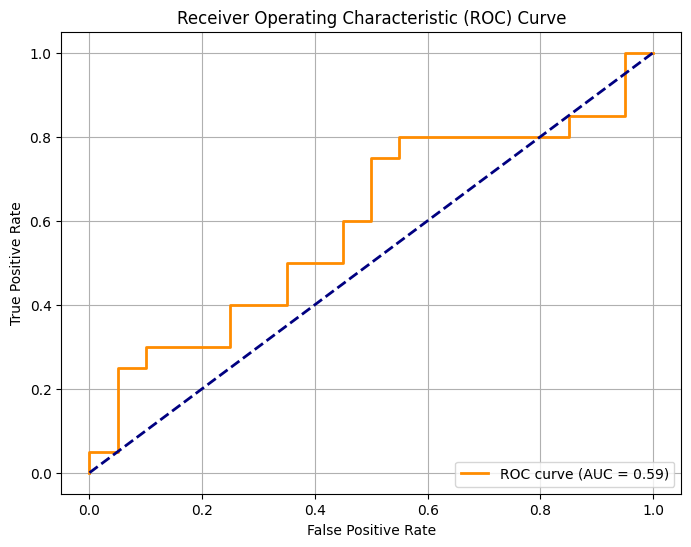

In [136]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_scores = svm_clf.decision_function(X_test_scaled)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc_score = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
